In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Inspection for Data with Demand Prediction

In [53]:
df = pd.read_excel('/Users/m.loh.3/product_customisation/predicted_products.xlsx')

In [54]:
df['Holiday'] = df['Date'].apply(lambda x: 1 if x.month== 12 and x.day in [25,26] else 0)

In [55]:
df.drop(columns=['Quantity'], inplace=True)

In [67]:
df.head()

,Base Product,Description,Date,Variation Type,Variation Detail,Customisation Complexity,Material,Price,Country,Actual Quantity,Predicted Quantity,Holiday
0,12 pencils tall tube,12 pencils tall tube skulls,2011-08-31,miscellaneous,miscellaneous: skulls,1,polymer,1.63,United Kingdom,5.0,12.671024,0
1,12 pencils tall tube,12 pencils tall tube skulls,2011-09-02,miscellaneous,miscellaneous: skulls,1,polymer,1.63,United Kingdom,15.0,11.021543,0
2,12 pencils tall tube,12 pencils tall tube skulls,2011-09-05,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,6.0,11.108441,0
3,12 pencils tall tube,12 pencils tall tube skulls,2011-09-06,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,26.0,8.349853,0
4,12 pencils tall tube,12 pencils tall tube skulls,2011-09-08,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,13.0,8.899697,0


## Data Inspection for products data

In [57]:
df1 = pd.read_excel('/Users/m.loh.3/product_customisation/products.xlsx')

In [58]:
df1.head()

,Base Product,Description,Date,Quantity,Variation Type,Variation Detail,Customisation Complexity,Material,Price,Country
0,12 pencils tall tube,12 pencils tall tube skulls,2009-12-01,28,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom
1,12 pencils tall tube,12 pencils tall tube skulls,2009-12-02,25,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom
2,12 pencils tall tube,12 pencils tall tube skulls,2009-12-03,28,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom
3,12 pencils tall tube,12 pencils tall tube skulls,2009-12-04,79,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom
4,12 pencils tall tube,12 pencils tall tube skulls,2009-12-05,12,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom


In [59]:
df1['Customisation Complexity'] = df1['Customisation Complexity'].apply(lambda x: 'Low' if x == 1 else ('Medium' if x == 2 else 'High'))

## Categorical Variables to Price

### plots

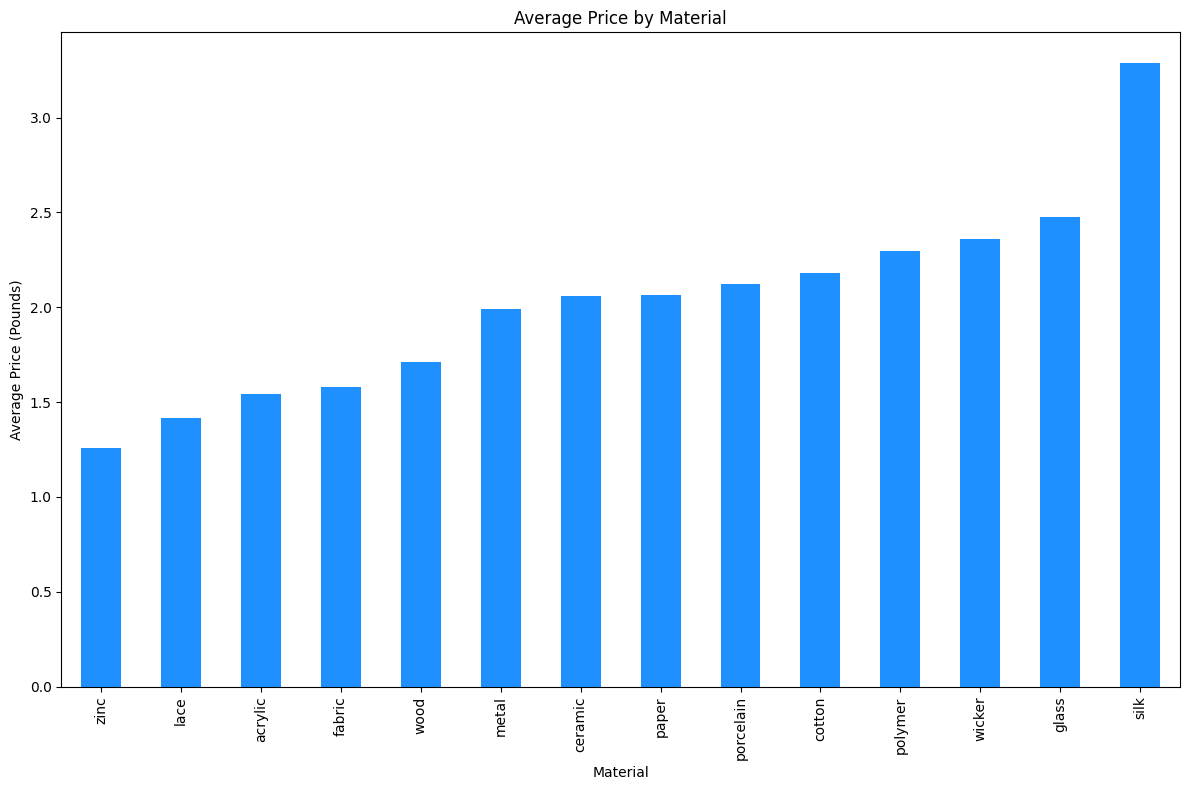

In [60]:
material_price = df1.groupby('Material')['Price'].mean().sort_values()
plt.figure(figsize=(12, 8))
plot4 = material_price.plot(kind='bar',color='dodgerblue', title='Average Price by Material')
plot4.set_ylabel('Average Price (Pounds)')
plot4.set_xlabel('Material')
plot4.set_xticklabels(plot4.get_xticklabels(), rotation=90, ha='center')
plt.tight_layout()

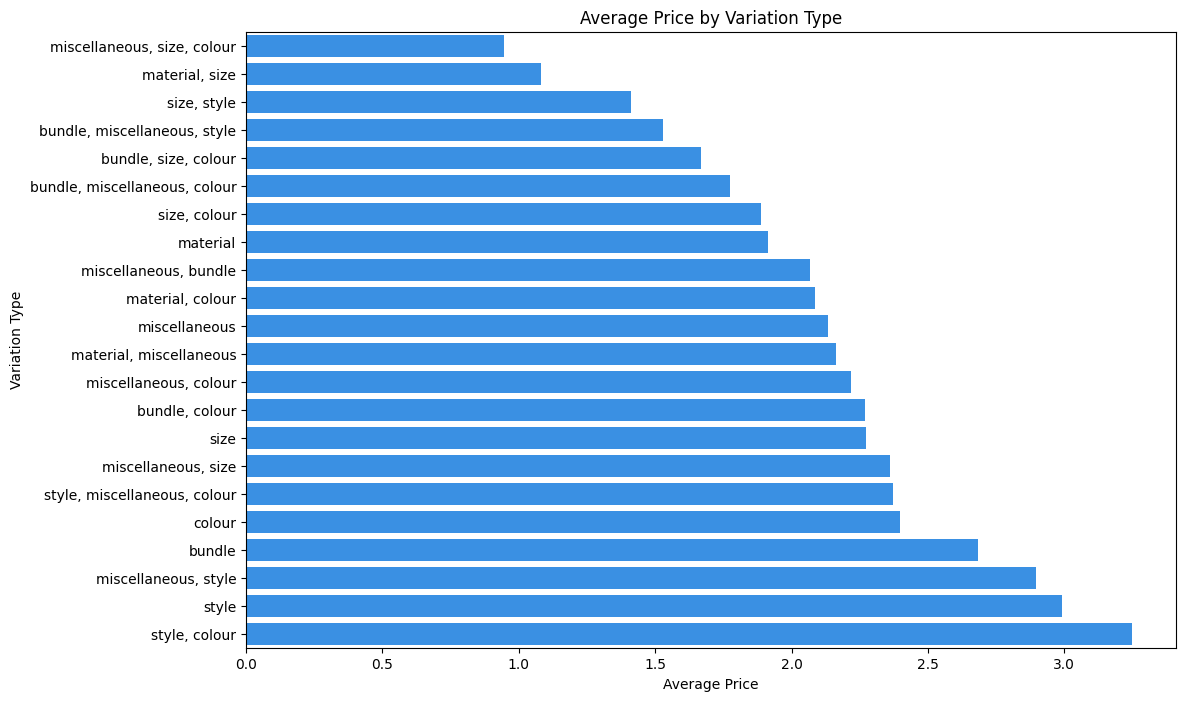

In [61]:
plt.figure(figsize=(12, 8))
variation_price = df1.groupby('Variation Type')['Price'].mean().sort_values()
sns.barplot(x=variation_price.values, y=variation_price.index, color='dodgerblue')
plt.title('Average Price by Variation Type')
plt.xlabel('Average Price')
plt.ylabel('Variation Type')
plt.show()


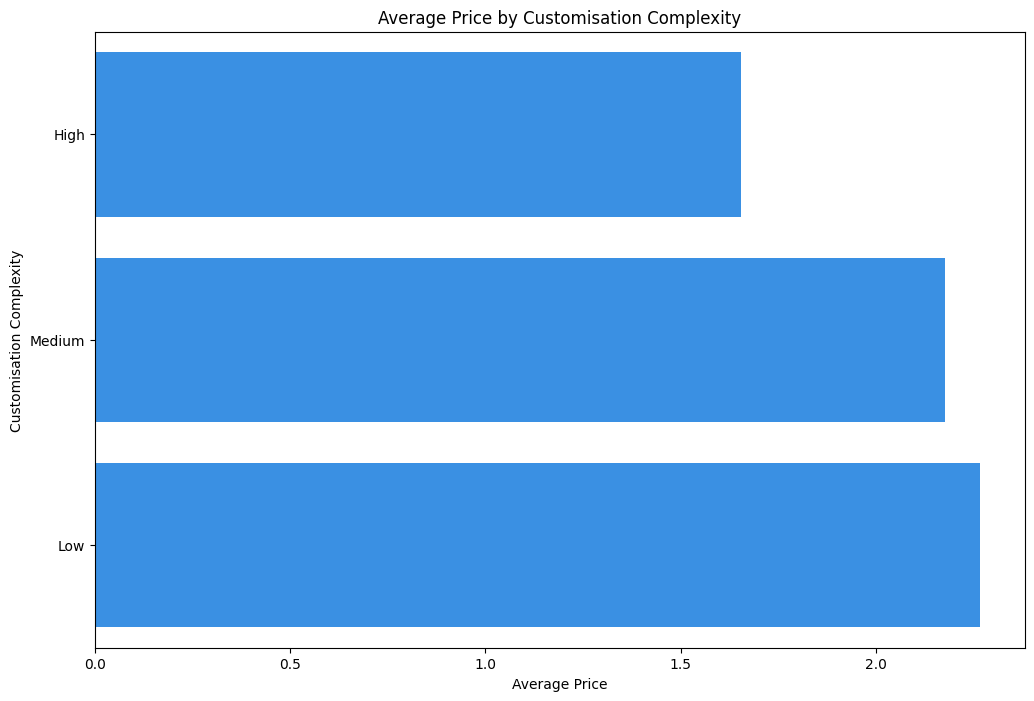

In [62]:
plt.figure(figsize=(12, 8))
complexity_price = df1.groupby('Customisation Complexity')['Price'].mean().sort_values()
sns.barplot(x=complexity_price.values, y=complexity_price.index, color='dodgerblue')
plt.title('Average Price by Customisation Complexity')
plt.xlabel('Average Price')
plt.ylabel('Customisation Complexity')
plt.show()

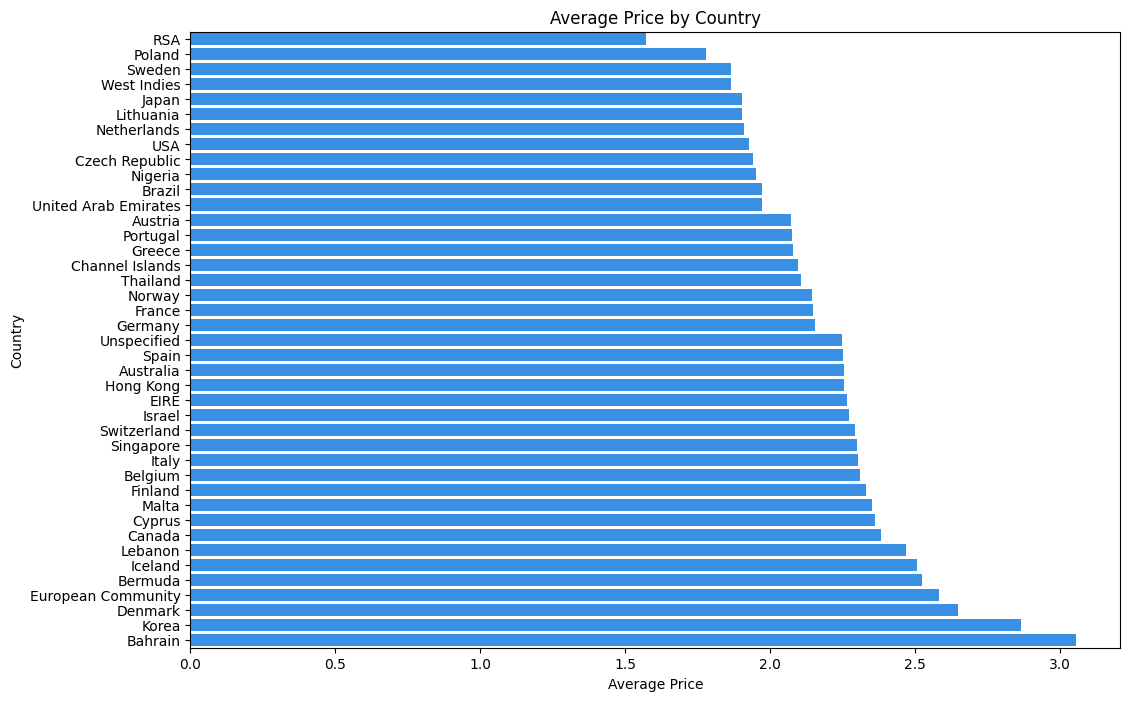

In [63]:
plt.figure(figsize=(12, 8))
country_price = df1.groupby('Country')['Price'].mean().sort_values()
country_price = country_price[country_price.index != 'United Kingdom']
sns.barplot(x=country_price.values, y=country_price.index, color='dodgerblue')
plt.title('Average Price by Country')
plt.xlabel('Average Price')
plt.ylabel('Country')
plt.show()

### Rankings Table

In [89]:
variation_price_rank = variation_price.reset_index().rename(columns={'Price': 'Average Price'})
variation_price_rank['Rank'] = variation_price_rank['Average Price'].rank(ascending=False)

complexity_price_rank = complexity_price.reset_index().rename(columns={'Price': 'Average Price'})
complexity_price_rank['Rank'] = complexity_price_rank['Average Price'].rank(ascending=False)

material_price_rank = material_price.reset_index().rename(columns={'Price': 'Average Price'})
material_price_rank['Rank'] = material_price_rank['Average Price'].rank(ascending=False)

country_price_rank = country_price.reset_index().rename(columns={'Price': 'Average Price'})
country_price_rank['Rank'] = country_price_rank['Average Price'].rank(ascending=False)

In [90]:
variation_price_rank.rename(columns={'Variation Type': 'Type'}, inplace=True)
complexity_price_rank.rename(columns={'Customisation Complexity': 'Type'}, inplace=True)
material_price_rank.rename(columns={'Material': 'Type'}, inplace=True)
country_price_rank.rename(columns={'Country': 'Type'}, inplace=True)

# Define ranking summary
ranking_summary = {
    'Variation Type': variation_price_rank,
    'Customisation Complexity': complexity_price_rank,
    'Material': material_price_rank,
    'Country': country_price_rank
}

# Concatenate with multi-index keys and reset the index
summary_df = pd.concat(ranking_summary.values(), keys=ranking_summary.keys(), names=['Category'])
summary_df.reset_index(level=0, inplace=True)  # Make 'Category' a column

# Display the resulting summary table
print(summary_df)

          Category                          Type  Average Price  Rank
0   Variation Type   miscellaneous, size, colour       0.944202  22.0
1   Variation Type                material, size       1.082342  21.0
2   Variation Type                   size, style       1.409524  20.0
3   Variation Type  bundle, miscellaneous, style       1.529363  19.0
4   Variation Type          bundle, size, colour       1.668125  18.0
..             ...                           ...            ...   ...
36         Country                       Bermuda       2.525000   5.0
37         Country            European Community       2.583333   4.0
38         Country                       Denmark       2.649397   3.0
39         Country                         Korea       2.864000   2.0
40         Country                       Bahrain       3.055185   1.0

[80 rows x 4 columns]


In [66]:
summary_df.head()

,Category,Type,Average Price,Rank
0,Variation Type,"miscellaneous, size, colour",0.944202,1.0
1,Variation Type,"material, size",1.082342,2.0
2,Variation Type,"size, style",1.409524,3.0
3,Variation Type,"bundle, miscellaneous, style",1.529363,4.0
4,Variation Type,"bundle, size, colour",1.668125,5.0


## Dynamic Pricing

In [69]:
df['Actual Revenue'] = df['Actual Quantity'] * df['Price']
df['Predicted Revenue'] = df['Predicted Quantity'] * df['Price']

### Place Holder Inventory

In [72]:
np.random.seed(42)  # For reproducibility
df['Inventory'] = np.random.randint(1, 81, size=len(df))

In [73]:
df.head()

,Base Product,Description,Date,Variation Type,Variation Detail,Customisation Complexity,Material,Price,Country,Actual Quantity,Predicted Quantity,Holiday,Actual Revenue,Predicted Revenue,Inventory
0,12 pencils tall tube,12 pencils tall tube skulls,2011-08-31,miscellaneous,miscellaneous: skulls,1,polymer,1.63,United Kingdom,5.0,12.671024,0,8.15,20.653770,52
1,12 pencils tall tube,12 pencils tall tube skulls,2011-09-02,miscellaneous,miscellaneous: skulls,1,polymer,1.63,United Kingdom,15.0,11.021543,0,24.45,17.965114,15
2,12 pencils tall tube,12 pencils tall tube skulls,2011-09-05,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,6.0,11.108441,0,5.10,9.442175,72
3,12 pencils tall tube,12 pencils tall tube skulls,2011-09-06,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,26.0,8.349853,0,22.10,7.097375,61
4,12 pencils tall tube,12 pencils tall tube skulls,2011-09-08,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,13.0,8.899697,0,11.05,7.564743,21


In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(y=df['Inventory'], color='dodgerblue')
plt.title('Inventory Distribution')
plt.ylabel('Inventory')
plt.grid(True)
plt.show()

In [76]:
def generate_rank_dict(summary_df, category):
    return dict(zip(summary_df[summary_df['Category'] == category]['Type'], summary_df[summary_df['Category'] == category]['Rank']))

# Load ranks for each category
country_ranks = generate_rank_dict(summary_df, 'Country')
variation_ranks = generate_rank_dict(summary_df, 'Variation Type')
material_ranks = generate_rank_dict(summary_df, 'Material')
complexity_ranks = generate_rank_dict(summary_df, 'Customisation Complexity')

In [77]:
def adjust_price(row, country_ranks, variation_ranks, material_ranks, complexity_ranks):
    # Initial price adjustment multiplier
    price_adjustment = 1.0
    
    # Adjustments based on ranks and factors
    country_rank = country_ranks.get(row['Country'], 1)
    price_adjustment += (country_rank / max(country_ranks.values())) * 0.2
    
    variation_rank = variation_ranks.get(row['Variation Type'], 1)
    price_adjustment += (variation_rank / max(variation_ranks.values())) * 0.1
    
    material_rank = material_ranks.get(row['Material'], 1)
    price_adjustment += (material_rank / max(material_ranks.values())) * 0.1
    
    complexity_rank = complexity_ranks.get(row['Customisation Complexity'], 1)
    price_adjustment += (complexity_rank / max(complexity_ranks.values())) * 0.05
    
    # Additional holiday price increase
    if row['Holiday'] == 1:
        price_adjustment += 0.15

    return price_adjustment

In [94]:
def optimize_dynamic_pricing(row, country_ranks, variation_ranks, material_ranks, complexity_ranks, max_iterations=30, target_revenue_increase=1.20):
    initial_price = row['Price']
    best_price = initial_price
    best_revenue = row['Predicted Revenue']
    actual_revenue = row['Actual Revenue']
    
    # Set parameters for inventory-based adjustment
    low_inventory_threshold = 20
    high_inventory_threshold = 60
    adjustment_step = 0.05  # Adjusts price by 5% increments
    
    if best_revenue >= actual_revenue * target_revenue_increase:
        best_price = initial_price * adjust_price(row, country_ranks, variation_ranks, material_ranks, complexity_ranks)
        if row['Inventory'] < low_inventory_threshold:
            best_price *= (1 + adjustment_step)  
        elif row['Inventory'] > high_inventory_threshold:
            best_price *= (1 - adjustment_step) 
        best_revenue = row['Predicted Quantity'] * best_price
        return best_price, best_revenue

    for iteration in range(max_iterations):
        # Apply custom adjustments to the price based on factors
        price_adjustment = adjust_price(row, country_ranks, variation_ranks, material_ranks, complexity_ranks)
        
        # Adjust price based on inventory levels
        if row['Inventory'] < low_inventory_threshold:
            price_adjustment *= (1 + adjustment_step)  # Increase price in steps for low inventory
        elif row['Inventory'] > high_inventory_threshold:
            price_adjustment *= (1 - adjustment_step)  # Decrease price in steps for high inventory
        else:
            price_adjustment *= (1 + adjustment_step)  
            
        new_price = best_price * price_adjustment
        
        # Calculate predicted revenue with the new price
        predicted_revenue = row['Predicted Quantity'] * new_price

        # If the new revenue is higher than the best recorded revenue, update best price and revenue
        if predicted_revenue > best_revenue:
            best_price = new_price
            best_revenue = predicted_revenue
        
        # Stop if the target revenue increase is achieved
        if best_revenue >= actual_revenue * target_revenue_increase:
            break

    return best_price, best_revenue

In [95]:
df[['Optimized Price', 'Optimized Predicted Revenue']] = df.apply(
    lambda row: pd.Series(optimize_dynamic_pricing(row, country_ranks, variation_ranks, material_ranks, complexity_ranks)),
    axis=1
)

# Calculate improvement over actual revenue
df['Revenue Improvement'] = df['Optimized Predicted Revenue'] - df['Actual Revenue']

In [96]:
df.head(60)

,Base Product,Description,Date,Variation Type,Variation Detail,Customisation Complexity,Material,Price,Country,Actual Quantity,Predicted Quantity,Holiday,Actual Revenue,Predicted Revenue,Inventory,Optimized Price,Optimized Predicted Revenue,Revenue Improvement
0,12 pencils tall tube,12 pencils tall tube skulls,2011-08-31,miscellaneous,miscellaneous: skulls,1,polymer,1.63,United Kingdom,5.0,12.671024,0,8.15,20.653770,52,1.874689,23.754234,15.604234
1,12 pencils tall tube,12 pencils tall tube skulls,2011-09-02,miscellaneous,miscellaneous: skulls,1,polymer,1.63,United Kingdom,15.0,11.021543,0,24.45,17.965114,15,2.870652,31.639017,7.189017
2,12 pencils tall tube,12 pencils tall tube skulls,2011-09-05,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,6.0,11.108441,0,5.10,9.442175,72,0.928719,10.316618,5.216618
3,12 pencils tall tube,12 pencils tall tube skulls,2011-09-06,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,26.0,8.349853,0,22.10,7.097375,61,3.209213,26.796453,4.696453
4,12 pencils tall tube,12 pencils tall tube skulls,2011-09-08,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,13.0,8.899697,0,11.05,7.564743,21,1.496966,13.322544,2.272544
5,12 pencils tall tube,12 pencils tall tube skulls,2011-09-09,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,38.0,6.830211,0,32.30,5.805679,75,5.965621,40.746449,8.446449
6,12 pencils tall tube,12 pencils tall tube skulls,2011-09-11,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,2.0,9.598521,0,1.70,8.158743,75,0.928719,8.914327,7.214327
7,12 pencils tall tube,12 pencils tall tube skulls,2011-09-13,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,2.0,5.097706,0,1.70,4.333050,24,0.977599,4.983511,3.283511
8,12 pencils tall tube,12 pencils tall tube skulls,2011-09-14,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,26.0,6.470187,0,22.10,5.499659,3,4.642992,30.041026,7.941026
9,12 pencils tall tube,12 pencils tall tube skulls,2011-09-15,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom,6.0,6.348784,0,5.10,5.396467,22,1.026479,6.516892,1.416892
